# 19. Remove Nth Node From End of List

### Difficulty: <font color = orange> Medium </font>

---
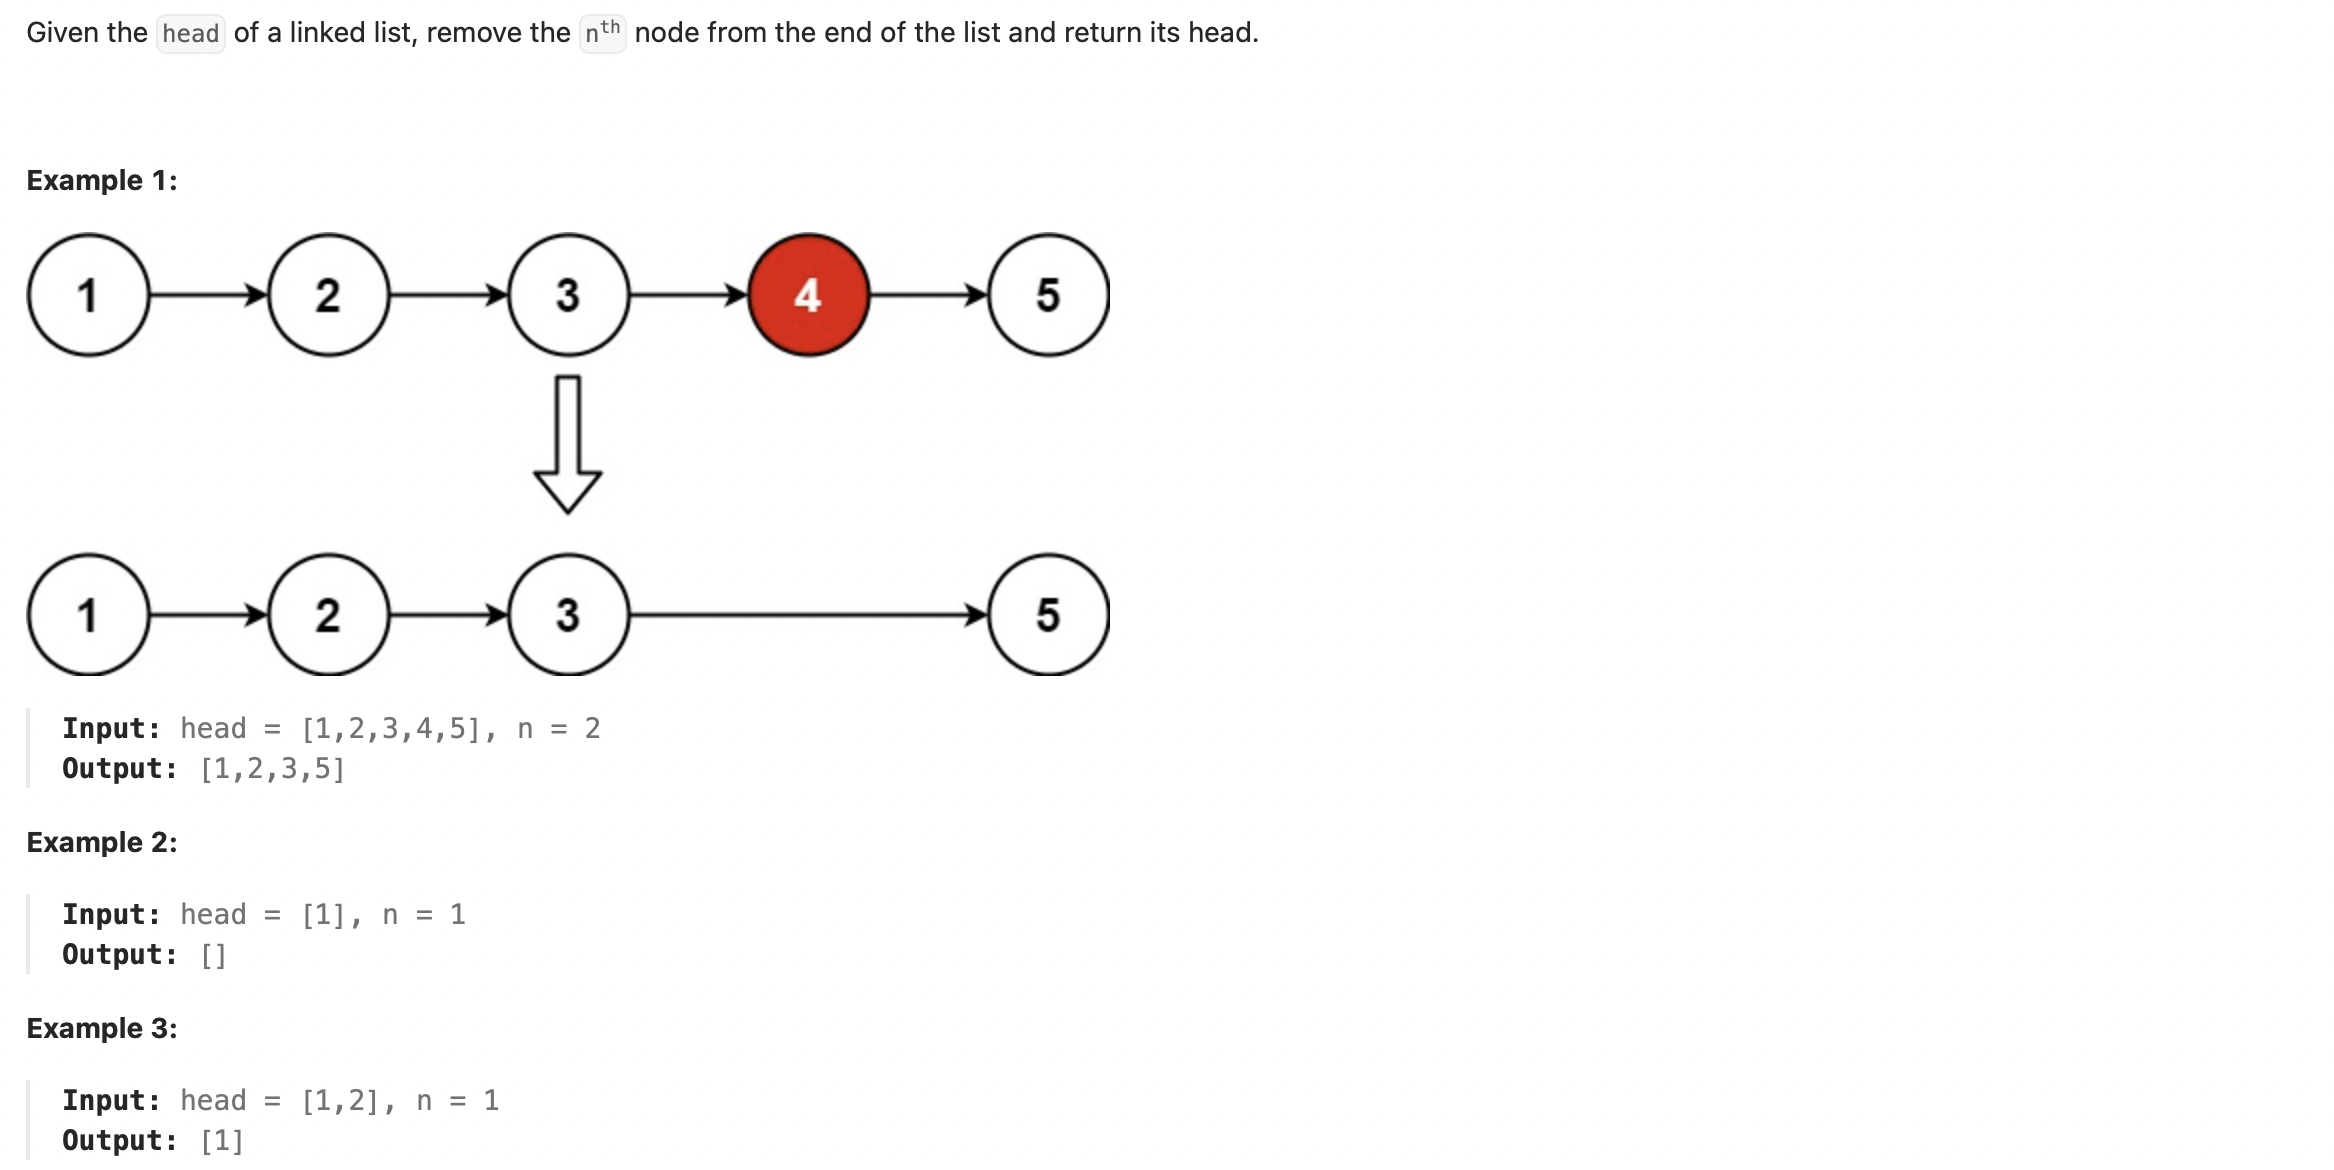

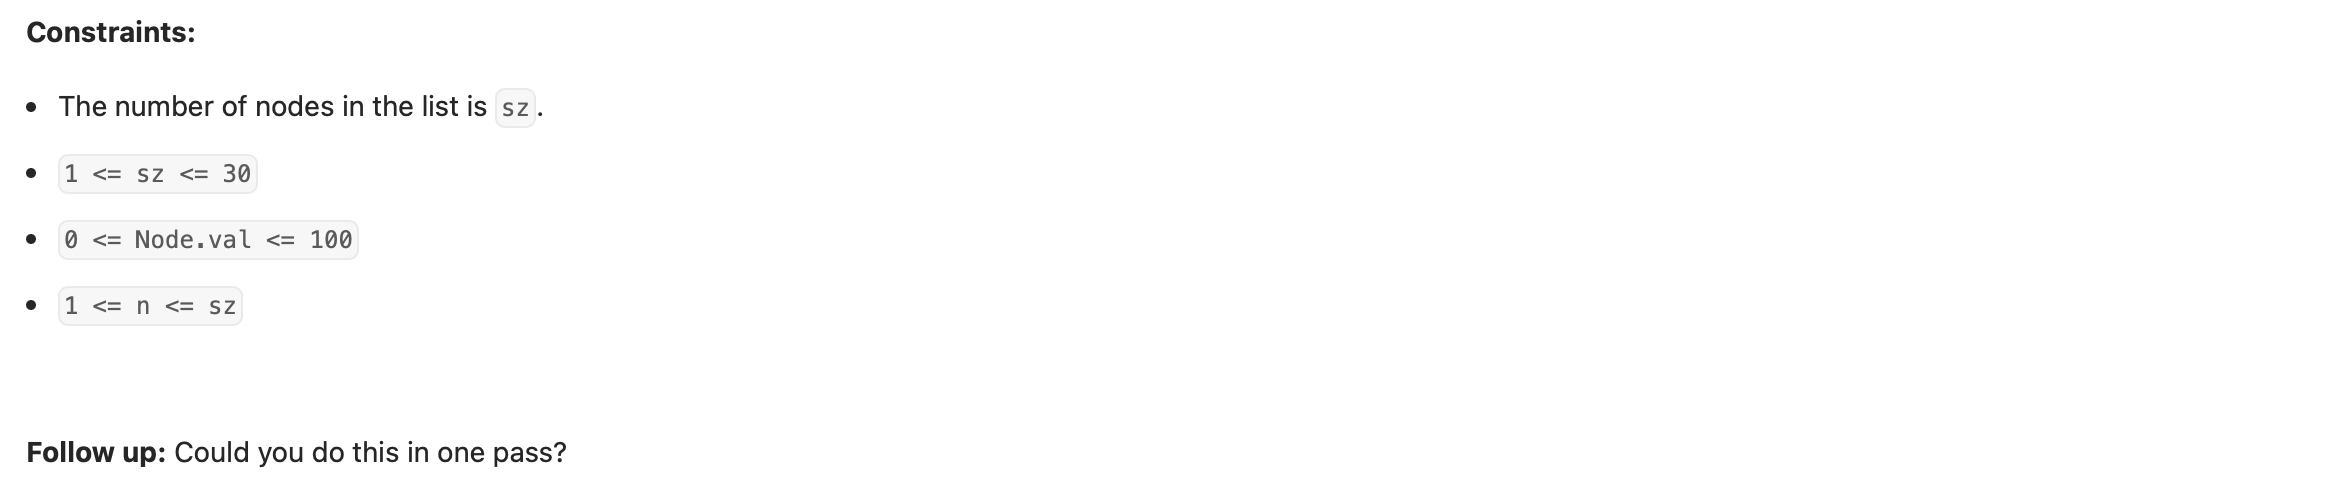

## Approach Overview:

To remove the `nth` node, we use the two pointer technique to firstly identify the `(n-1)th` node and then change its pointer to point to the `(n+1)th` node instead of the `nth` node. This pointer replacement ops will remove the `nth` node.

## Detailed Explanation:

The key thing here is to be able to identify the `(n-1)th` node algorithmically. Because this is the node I need to change the pointer reference inorder to "delete" the `nth` node. 

We use two pointers and a dummy node to help us achieve this.

**Why a dummy node?**

It always guarantees us access of the `(n-1)th` node. 

In edge cases where the node we need to remove is the starting / beginning / head node, it's impossible to access `(n-1)th` node because it doesn't exist. So removing the head node becomes impossible in these cases. To get around these edge cases we simply add an extra dummy node as the new head of the list. This will allow us to remove the starting nodes in the list.

**Why use two pointers and How does this technique work?**

Well it will help us identify the `(n-1)th` node in the list. 

How it works: 

We firstly initialize two pointers (let's call them **left and right**) to point at the dummy node in the list.

Next we only move the **right pointer** `n` many times, such that by the end the left and right pointers are separated by a distance of `n` nodes. 

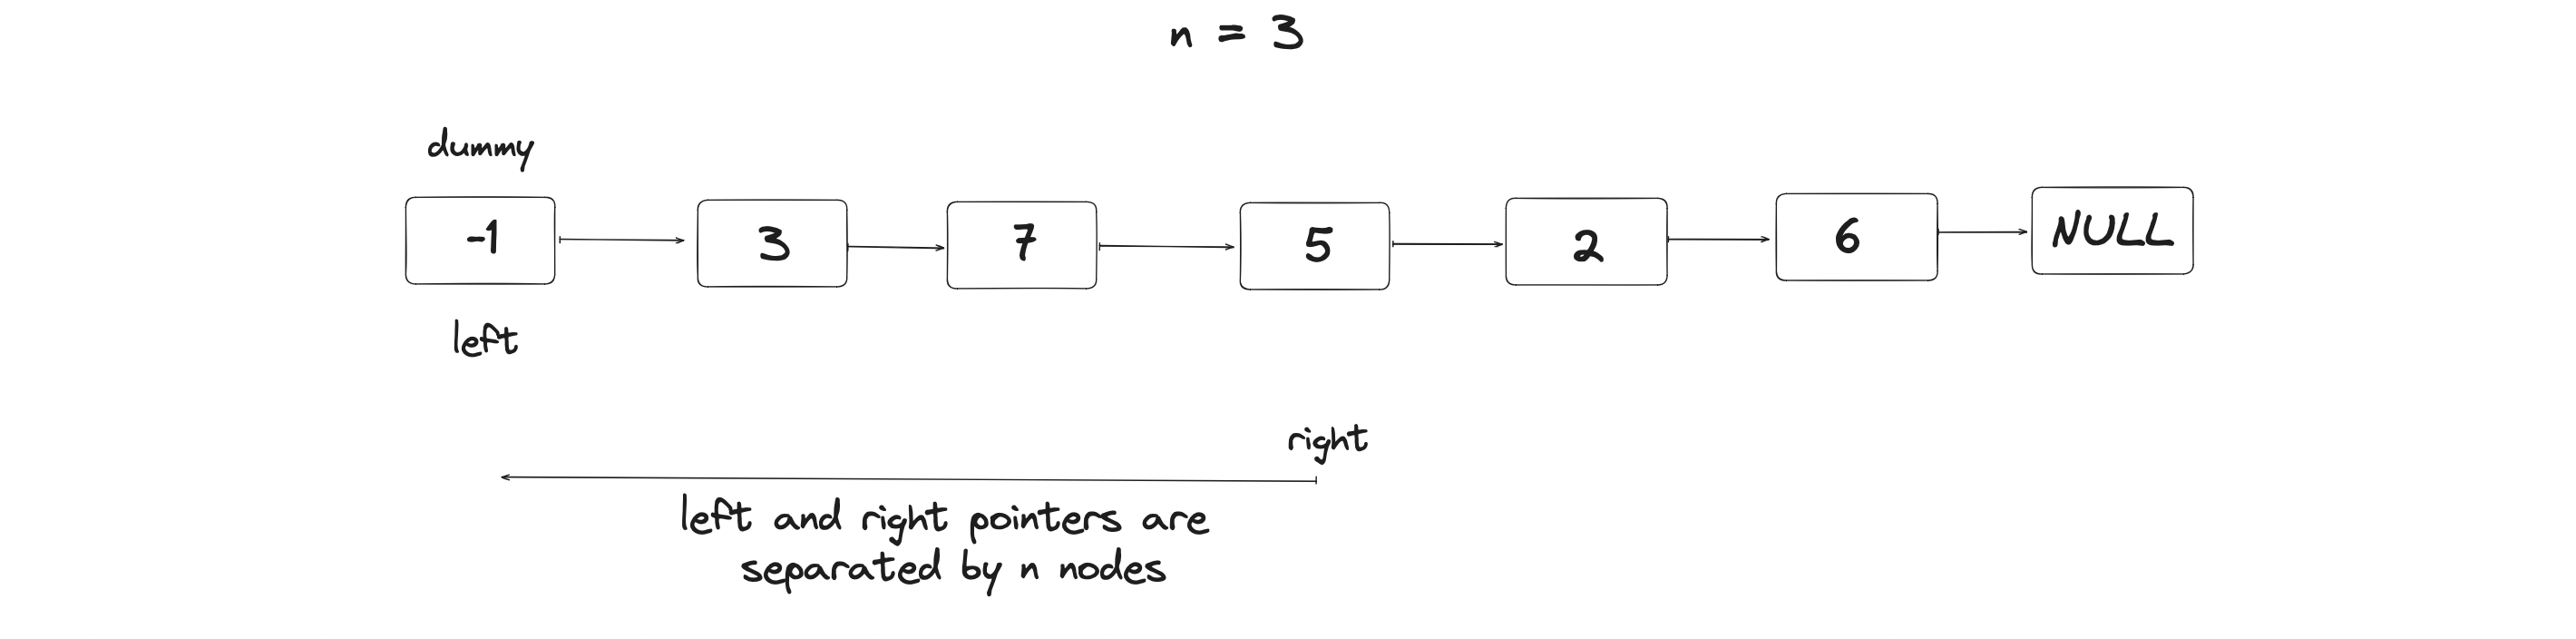

We then move the **left and right pointers** one step at a time until the **right pointer** reaches the last / tail node in the list. By then the **left pointer** will have reached the `(n-1)th` node. 

Finally we then change the pointer of the `(n-1)th` node to point to the `(n+1)th` node instead of the `nth` node. This will essentially 'delete' / 'remove' the `nth` node in the list.

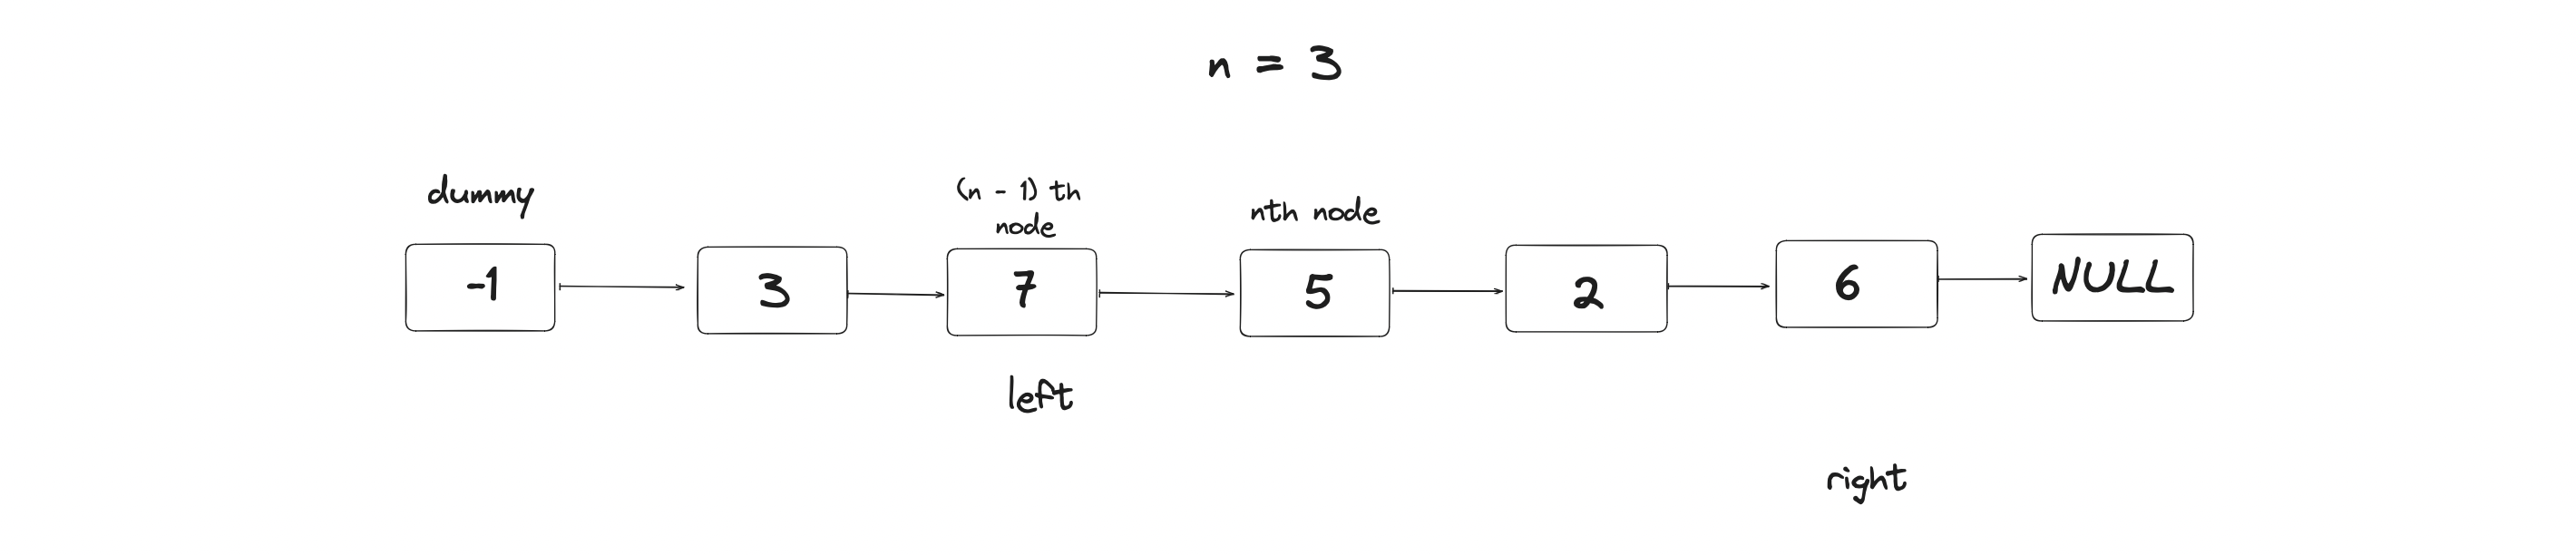

## Key Challenges:

1. Algorithmically finding the `(n-1)th` node in the list.

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        # create a dummy node
        dummy = ListNode(-1)

        # set dummy node as the head of the list
        dummy.next = head

        # initialize left and right pointer to the head of the list (dummy node)
        left = right = dummy


        # loop n many times
        for _ in range(n):
            # move right pointer by one step
            right = right.next
        
        while right.next:
            # move left pointer by one step
            left = left.next
            # move right pointer by one step
            right = right.next

        # set the pointer of the current node to point to the next two upcoming node
        left.next = left.next.next

        # return the head of the updated list
        return dummy.next

## Alternative solution I came up with on my own.

## Approach Overview:

Iterate through the list to count the total number of nodes. Then iterate through the list again until we reach the `(n-1)th` node. We can find it by keeping count of the rank of each node in the list.

This will look like this 

**loop until total number of nodes - rank of current node = n**

Once we find the node that satisfies this condition. We terminate the loop. And then change the node's pointer settings inorder for us to remove the `nth` node.

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        
        totalNodes = 1
        dummy = ListNode(-1)
        dummy.next = head
        current = dummy
        count = 1
       
        while current.next:
            totalNodes += 1
            current = current.next
        
        current = dummy
        # 
        while (totalNodes - count) > n:
            current = current.next
            count += 1
        
        current.next = current.next.next

        return dummy.next